In [ ]:
# 1. Setup Kaggle in Colab
!pip install -q kaggle
from google.colab import files
files.upload()  # Upload kaggle.json from your Kaggle account
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# 2. Download and unzip ASL Alphabet dataset
!kaggle datasets download -d grassknoted/asl-alphabet
!unzip -q asl-alphabet.zip -d /content/asl_data


Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
 99% 1.01G/1.03G [00:16<00:00, 114MB/s]
100% 1.03G/1.03G [00:17<00:00, 64.7MB/s]


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
train_dir = "/content/asl_data/asl_alphabet_train/asl_alphabet_train"
test_dir  = "/content/asl_data/asl_alphabet_test/asl_alphabet_test"


In [ ]:
# 4️ Data Generators
img_size = (64, 64)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

print("Class mapping:", train_gen.class_indices)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Class mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


In [ ]:
# Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_gen.class_indices), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 29)             │         7,453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,605 (4.89 MB)

 Trainable params: 1,280,605 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

Epoch 1/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 697s 320ms/step - accuracy: 0.4055 - loss: 1.9935 - val_accuracy: 0.7356 - val_loss: 0.9212
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 669s 308ms/step - accuracy: 0.8606 - loss: 0.4064 - val_accuracy: 0.7818 - val_loss: 0.7363
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 665s 306ms/step - accuracy: 0.9234 - loss: 0.2300 - val_accuracy: 0.8168 - val_loss: 0.6935
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 687s 316ms/step - accuracy: 0.9465 - loss: 0.1618 - val_accuracy: 0.8253 - val_loss: 0.6431
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 689s 317ms/step - accuracy: 0.9571 - loss: 0.1294 - val_accuracy: 0.8598 - val_loss: 0.5614
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 688s 316ms/step - accuracy: 0.9658 - loss: 0.1058 - val_accuracy: 0.8633 - val_loss: 0.4768
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 672s 309ms/step - accuracy: 0.9711 - loss: 0.0886 - val_accuracy: 0.8502 - val_loss: 0.6623
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 673s 309ms/step - ac

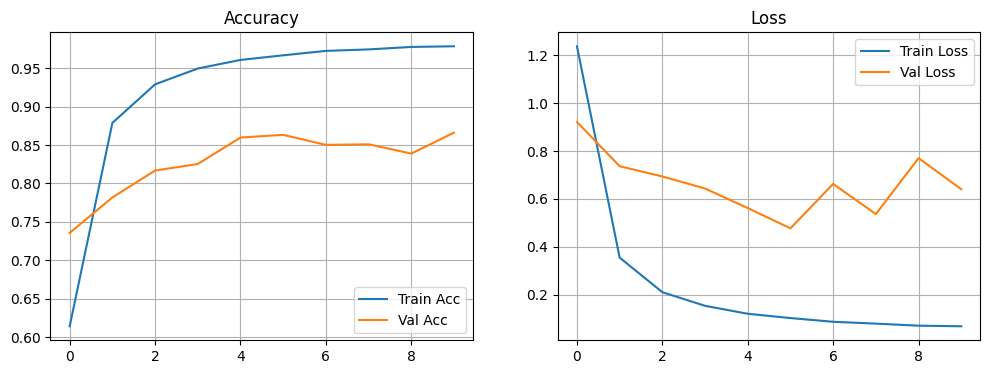

In [ ]:
# Accuracy & Loss Curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.grid(True)
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.grid(True)
plt.title("Loss")
plt.show()


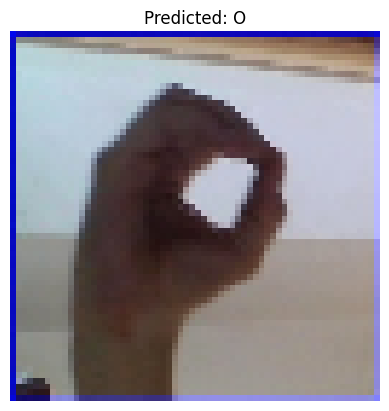

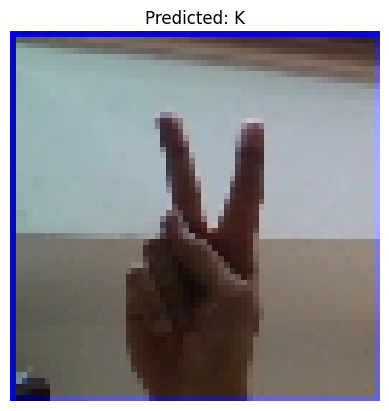

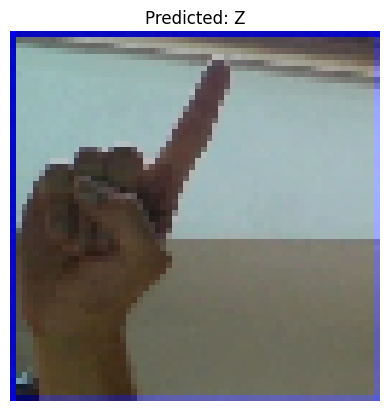

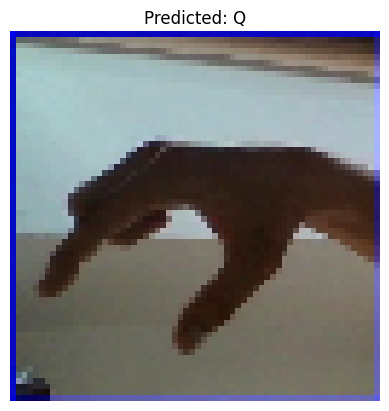

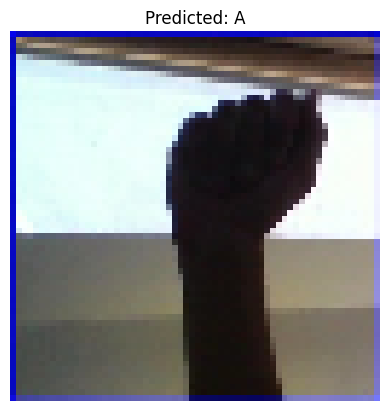

In [ ]:
# Prediction on Sample Test Images
from tensorflow.keras.preprocessing import image

idx_to_class = {v: k for k, v in train_gen.class_indices.items()}

sample_paths = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.png')):
            sample_paths.append(os.path.join(root, file))

# Take 5 samples
sample_paths = sample_paths[:5]

for img_path in sample_paths:
    img = image.load_img(img_path, target_size=img_size)
    x = image.img_to_array(img) / 255.0
    pred = model.predict(x[np.newaxis, ...], verbose=0)
    pred_class = np.argmax(pred, axis=1)[0]
    pred_letter = idx_to_class[pred_class]

    plt.imshow(img)
    plt.title(f"Predicted: {pred_letter}")
    plt.axis("off")
    plt.show()